<a href="https://colab.research.google.com/github/aafreen2212/DL/blob/master/DL_Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib

image1_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n04037443")#racing car synset
print(image1_page.content)


image2_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n04037443")#jeep synset
print(image2_page.content)

image3_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n04037443")#ambulance elephant synset
print(image3_page.content)

from bs4 import BeautifulSoup
image1_soup = BeautifulSoup(image1_page.content, 'html.parser') #puts the content of the website into the soup variable, each url on a different line
image2_soup = BeautifulSoup(image2_page.content, 'html.parser')
image3_soup= BeautifulSoup(image3_page.content, 'html.parser')

b"http://www.upmoon.com/up7/Mitsubishi%20Eclipse%20Street%20Racing%20Car.jpg\r\nhttp://www.hunternet.com.au/members/uploads/images/SkidPadFront.jpg\r\nhttp://farm1.static.flickr.com/202/463662585_60ea3e8381.jpg\r\nhttp://www.cardsunlimited.com/largeimage/RacingCar.jpg\r\nhttp://www.iceposter.com/thumbs/A11870_b.jpg\r\nhttp://images.stockcarracing.com/thehistoryof/bio/0305134_5z+UPS_Ford_Taurus_Race_Car_And_Alltel_Race_Car+Side_View_Crash.jpg\r\nhttp://farm1.static.flickr.com/52/125814197_2134befc92.jpg\r\nhttp://www.modulinecabinets.com/images/racingcar3.jpg\r\nhttp://www.motorsportscenter.com/Gallery/Lotus/2002/EspritHighlights/images/GT2%20Race%20Car.jpg\r\nhttp://static.flickr.com/27/45610287_7ab9519ec3.jpg\r\nhttp://static.flickr.com/58/189717326_074d658caf.jpg\r\nhttp://farm1.static.flickr.com/191/452522204_2d00bf011f.jpg\r\nhttp://farm4.static.flickr.com/3042/2591353506_623f4024c2.jpg\r\nhttp://www.rotaryaviation.com/images/Race_cars_Seals/Race_cars_Seals/quiles.jpg\r\nhttp://far

***Question 1***: Extracting image data and storing them as trai, test and validation sets.

In [2]:

image1_str_soup=str(image1_soup)#convert soup to string so it can be split
type(image1_str_soup)
image1_split_urls=image1_str_soup.split('\r\n')#split so each url is a different possition on a list
print(len(image1_split_urls))#print the length of the list so you know how many urls you have

image2_str_soup=str(image2_soup)#convert soup to string so it can be split
type(image2_str_soup)
image2_split_urls=image2_str_soup.split('\r\n')#split so each url is a different possition on a list
print(len(image2_split_urls))

image3_str_soup=str(image2_soup)#convert soup to string so it can be split
type(image3_str_soup)
image3_split_urls=image3_str_soup.split('\r\n')#split so each url is a different possition on a list
print(len(image3_split_urls))


1552
1552
1552


In [3]:
!mkdir /content/data_train/ 
!mkdir /content/data_test/ 
!mkdir /content/data_validation/

img_rows, img_cols = 32, 32 #number of rows and columns to convert the images to
input_shape = (img_rows, img_cols, 3)#format to store the images (rows, columns,channels) called channels last

**For train data**

In [4]:
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

#the number of training images to use
n_of_training_images=100 
for progress in range(n_of_training_images):#store all the images on a directory
 
    if(progress%20==0):
        print(progress)
    if not image1_split_urls[progress] == None:
      try:
        I = url_to_image(image1_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/data_train/afr.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

for progress in range(n_of_training_images):#store all the images on a directory
  
    if(progress%20==0):
        print(progress)
    if not image2_split_urls[progress] == None:
      try:
        I = url_to_image(image2_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/data_train/ind.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

for progress in range(n_of_training_images):#store all the images on a directory
  
    if(progress%20==0):
        print(progress)
    if not image3_split_urls[progress] == None:
      try:
        I = url_to_image(image3_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/data_train/ind.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

0
20
40
60
80
0
20
40
60
80
0
20
40
60
80


**For test data**

In [5]:
for progress in range(50):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not image1_split_urls[progress] == None:
      try:
        I = url_to_image(image1_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/data_test/afr.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

#Similarly for other two type of images
for progress in range(50):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not image2_split_urls[progress] == None:
      try:
        I = url_to_image(image2_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/data_test/ind.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

for progress in range(50):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not image3_split_urls[progress] == None:
      try:
        I = url_to_image(image3_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/data_test/ind.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

0
20
40
0
20
40
0
20
40


**Data for validation set** 

In [6]:
for progress in range(50):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not image1_split_urls[progress] == None:
      try:
        I = url_to_image(image1_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/data_validation/afr.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

#Similarly for other two type of images
for progress in range(50):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not image2_split_urls[progress] == None:
      try:
        I = url_to_image(image2_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/data_validation/ind.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

for progress in range(50):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not image3_split_urls[progress] == None:
      try:
        I = url_to_image(image3_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/data_validation/ind.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

0
20
40
0
20
40
0
20
40


In [7]:
# Path to the train folder
import os
original_train = '/content/data_train/'
 
filenames = os.listdir(original_train)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'afr':
        categories.append('0')
    else:
        categories.append('1')

#Create a dataframe
import pandas as pd
data = pd.DataFrame({'filename':filenames,'label':categories})

data.to_csv("original_data_train.csv",index=False)

In [8]:
# Path to the test folder
import os
original_test = '/content/data_test/'
 
filenames = os.listdir(original_test)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'afr':
        categories.append('0')
    else:
        categories.append('1')

import pandas as pd
data_test = pd.DataFrame({'filename':filenames,'label':categories})

data_test.to_csv("original_data_test.csv",index=False)

In [9]:
# Path to the validation folder

original_validation = '/content/data_validation/'
 
filenames = os.listdir(original_validation)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'afr':
        categories.append('0')
    else:
        categories.append('1')

import pandas as pd
data_test = pd.DataFrame({'filename':filenames,'label':categories})

data_test.to_csv("original_data_validation.csv",index=False)

**Creating the Classification Model**

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator


Image Augmentation

In [11]:
#data generators objects

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, validation_split=0.2)

val_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, validation_split=0.2)
#flow_from_dataframe()

train_generator = train_datagen.flow_from_dataframe(dataframe=data, 
                                                       directory=original_train,
                                                       x_col='filename',
                                                       y_col='label',
                                                       seed=7,
                                                       shuffle=True,
                                                       subset='training',
                                                       class_mode='categorical',
                                                       target_size=(150,150))

val_generator = val_datagen.flow_from_dataframe(dataframe=data, 
                                                       directory=original_validation,
                                                       x_col='filename',
                                                       y_col='label',
                                                       seed=7,
                                                       shuffle=True,
                                                       subset='validation',
                                                       class_mode='categorical',
                                                       target_size=(150,150))



test_generator = test_datagen.flow_from_dataframe(dataframe=data_test, 
                                                  directory=original_test,
                                                  x_col='filename',
                                                  y_col='label',
                                                  seed=7,
                                                  shuffle=False,                                                  
                                                  class_mode=None,
                                                  target_size=(150,150))

Found 87 validated image filenames belonging to 2 classes.
Found 5 validated image filenames belonging to 2 classes.
Found 52 validated image filenames.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 82 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [12]:
model = Sequential()
model.add(Conv2D(512, (150,150), padding='valid', activation='relu', input_shape=(150,150,3)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [13]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#Early stopping and checkpoint
filepath="weights.{epoch:02d}-{val_loss:.2f}.hdf5"

earlystopping = EarlyStopping(monitor='val_loss', verbose=1, patience=5, mode="min")
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode="max")
history = model.fit_generator(generator=train_generator, validation_data=val_generator, epochs=50, verbose=1, callbacks=[earlystopping, checkpoint])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
3/3 [==============================] - ETA: 0s - loss: 25.3779 - accuracy: 0.5057
Epoch 00001: val_accuracy improved from -inf to 0.60000, saving model to weights.01-37.26.hdf5
3/3 [==============================] - 5s 2s/step - loss: 25.3779 - accuracy: 0.5057 - val_loss: 37.2575 - val_accuracy: 0.6000
Epoch 2/50
3/3 [==============================] - ETA: 0s - loss: 12.9342 - accuracy: 0.5057
Epoch 00002: val_accuracy did not improve from 0.60000
3/3 [==============================] - 3s 1s/step - loss: 12.9342 - accuracy: 0.5057 - val_loss: 22.2546 - val_accuracy: 0.4000
Epoch 3/50
3/3 [==============================] - ETA: 0s - loss: 12.5006 - accuracy: 0.4713
Epoch 00003: val_accuracy did not improve from 0.60000
3/3 [==============================] - 3s 1s/step - loss: 12.5006 - accuracy: 0.4713 - val_loss: 14.5143 - val_accuracy: 0.6000
Epoch 4/50
3/3 [==============================] - ETA: 0

● Plot the accuracy vs validation accuracy: 


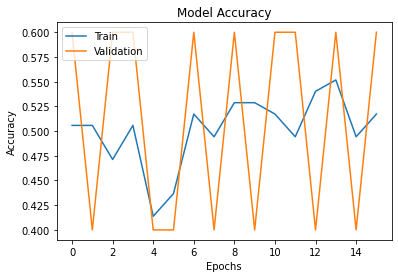

In [15]:
#plot results
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc = 'upper left')

● Plot loss vs validation loss:

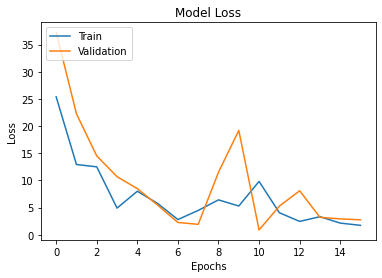

In [16]:
#plot results
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc = 'upper left')

● Plot model summary: 
 

In [17]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 1, 512)         34560512  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
Total params: 34,955,010
Trainable params: 34,955,010
Non-trainable params: 0
_________________________________________________________________
None
